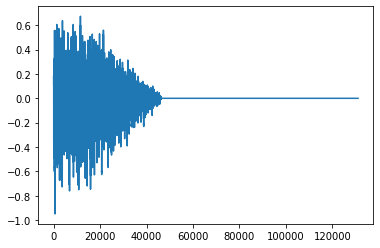

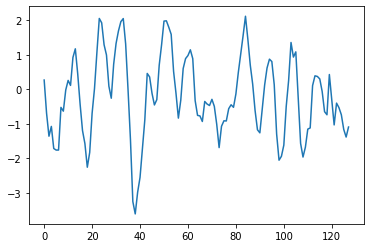

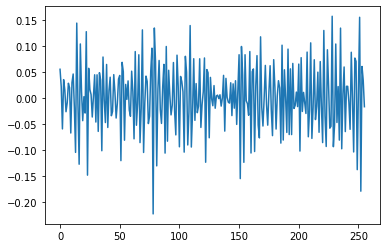

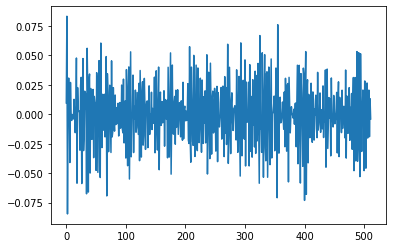

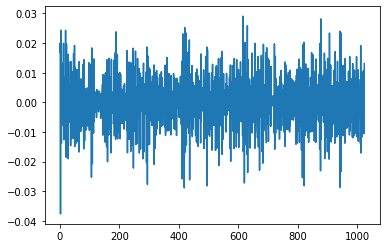

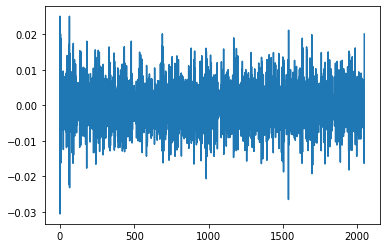

In [53]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import display, Audio, display_markdown
from featuresynth.data import batch_stream
from featuresynth.feature import audio
from featuresynth.audio.transform import fft_frequency_decompose, fft_resample
from featuresynth.audio import RawAudio
import zounds
import torch
import numpy as np

path = '/hdd/musicnet/train_data'
pattern = '*.wav'
total_samples = 2 ** 17

samplerate = zounds.SR22050()
feature_spec = {
    'audio': (total_samples, 1)
}

feature_funcs = {
    'audio': (audio, (samplerate,))
}

batch_size = 1
bs = batch_stream(
    path, pattern, batch_size, feature_spec, 'audio', feature_funcs)

samples, = next(bs)
display(Audio(samples.squeeze(), rate=22050))
samples = torch.from_numpy(samples)
min_size = int(2 ** (np.log2(total_samples) - 4))

bands = fft_frequency_decompose(samples, min_size)
plt.plot(samples.squeeze())
plt.show()

plt.plot(bands[8192].squeeze()[:128])
plt.show()

plt.plot(bands[8192*2].squeeze()[:256])
plt.show()

plt.plot(bands[8192*4].squeeze()[:512])
plt.show()

plt.plot(bands[8192*8].squeeze()[:1024])
plt.show()

plt.plot(bands[8192*16].squeeze()[:2048])
plt.show()


display(Audio(fft_resample(bands[8192], total_samples, is_lowest_band=True).data.cpu().numpy().squeeze(), rate=22050))
display(Audio(fft_resample(bands[8192*2], total_samples, is_lowest_band=False).data.cpu().numpy().squeeze(), rate=22050))
display(Audio(fft_resample(bands[8192*4], total_samples, is_lowest_band=False).data.cpu().numpy().squeeze(), rate=22050))
display(Audio(fft_resample(bands[8192*8], total_samples, is_lowest_band=False).data.cpu().numpy().squeeze(), rate=22050))
display(Audio(fft_resample(bands[8192*16], total_samples, is_lowest_band=False).data.cpu().numpy().squeeze(), rate=22050))

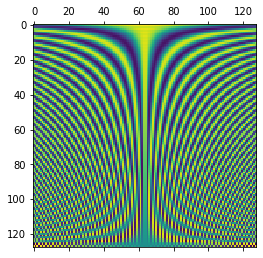

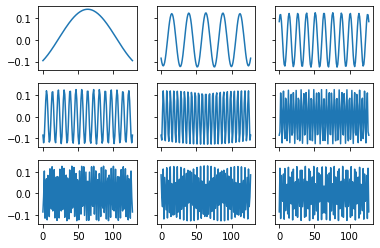

In [83]:
fb = zounds.learn.FilterBank(
        samplerate=zounds.SR22050() * 16,
        kernel_size=128,
        scale=zounds.LinearScale(zounds.FrequencyBand(0, 689), 128),
        scaling_factors=0.05,
        normalize_filters=True,
        a_weighting=False)


plt.matshow(fb.filter_bank.squeeze())
plt.show()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
ax1.plot(fb.filter_bank.squeeze()[1])
ax2.plot(fb.filter_bank.squeeze()[10])
ax3.plot(fb.filter_bank.squeeze()[20])
ax4.plot(fb.filter_bank.squeeze()[30])
ax5.plot(fb.filter_bank.squeeze()[50])
ax6.plot(fb.filter_bank.squeeze()[70])
ax7.plot(fb.filter_bank.squeeze()[90])
ax8.plot(fb.filter_bank.squeeze()[100])
ax9.plot(fb.filter_bank.squeeze()[105])


